In [1]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("archive/"))

['Z=0.5', 'Z=1', 'Z=1.5', 'Z=1.8', '__MACOSX']


In [2]:
"""Step 1 -  Aggregating  from  only 1  folder"""
import os
directory='C://Users//sahil//Downloads//Archive//Z=1//'
time=[]
feature1=[]
feature2=[]
target=[]
 
for filename in os.listdir(directory):
    
 
    file=directory+filename
    ext = os.path.splitext(file)[-1].lower()
    if ext == ".txt":
        print(file)
        try:
            
            f=open(file,"r")
            #read  all lines
            lines=f.readlines()
        except:
            f=open(file,"r",encoding='utf-16')
            #read  all lines
            lines=f.readlines()
            #creatly  empty list  variables for  feature  1 ,  feature 2  and   target 
        for x in lines:
            time.append(x.split('\t')[0])
            feature1.append(x.split('\t')[1])#splitting  by delimitator meaning \t and tak  first element  meaning  feat1 
            feature2.append(x.split('\t')[2])#splitting  by delimitator and tahe  second element  which is  feature 2
            target.append((x.split('\t')[3]).split('\n')[0])
            f.close()

C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_10000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_100000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_10000000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_1200000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_12000000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_14800000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_152000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_1800000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_18800000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_20000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_2200.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_224000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_22800000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_2480000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_27600000.txt
C://Users//sahil//Downloads//Archive//Z=1//Z=1.0_3280000.txt
C://Users//sahil//Downloads/

In [3]:
import pandas as pd
import numpy as np
train=pd.DataFrame({'Time':time, 'Feature1':np.array(feature1),'Feature2':np.array(feature2),
                    'target':np.array(target)})

In [4]:
 train.shape

(510102, 4)

In [5]:
train.head() 

,Time,Feature1,Feature2,target
0,0.0000000000000000e+00,6.4470030817754131e-01,6.4470030817754131e-01,3.1622075309409475e-01
1,1.0000000000000000e-03,6.4470030817754131e-01,6.4470030817754131e-01,3.1493278683333620e-01
2,2.0000000000000000e-03,6.4470030817754131e-01,6.4460076164633429e-01,3.1364744351410279e-01
3,3.0000000000000001e-03,6.4470020863101007e-01,6.4440311254406468e-01,3.1236472306185659e-01
4,4.0000000000000001e-03,6.4469991143537664e-01,6.4410878925358139e-01,3.1108462538991821e-01


In [6]:
 train.dtypes

Time        object
Feature1    object
Feature2    object
target      object
dtype: object

In [7]:
train['Time']=train['Time'].astype(float)

In [8]:
train['Feature1']=train['Feature1'].astype(float)

In [9]:
train['Feature2']=train['Feature2'].astype(float)

In [10]:
train['target']=train['target'].astype(float)

In [11]:
train.corr()

,Time,Feature1,Feature2,target
Time,1.000000,-0.298701,0.279220,-0.009076
Feature1,-0.298701,1.000000,-0.474805,0.176141
Feature2,0.279220,-0.474805,1.000000,0.355129
target,-0.009076,0.176141,0.355129,1.000000


In [12]:
train.to_csv('data.csv',index=False)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
def callback_features(X ,size_feat, size_step):
    n_features=X.shape[1]
    features=[]
    feature_names=[]
    X=pd.DataFrame(X)
    for k in range(size_feat, 0 , -1):
        features.append(X.shift(k))
        feature_names+=([('Feature%d(t-%d)' % (j+1, k)) for j in range(n_features)])
    for  c in range(0,size_step):
        features.append(X.shift(-c))
        if c==0:
            feature_names+=([('Feature%d(t)' % (j+1)) for j in range(n_features)])
        else :
            feature_names+=([('Feature%d(t-%d)' % (j+1, c)) for j in range(n_features)])
    feature_history=pd.concat(features,axis=1)
    feature_history.columns=feature_names
    return feature_history
            

In [16]:
training=callback_features(train,1,1)
from sklearn.preprocessing import MinMaxScaler
training=training.fillna(training.mean())
training=np.array(training)

#training=enc.fit_transform(training)
X, y = training[:, :-1], training[:, -1]
  


In [17]:
enc1=MinMaxScaler()
X= enc1.fit_transform(X)

In [18]:
 X = X.reshape((X.shape[0], 1, X.shape[1]))

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
model = Sequential()
model.add(LSTM(25, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(25,kernel_initializer='normal',activation='linear'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
 
history = model.fit(X, y, epochs=1000, batch_size=32, 
                  verbose=1, shuffle=False)
 
import  matplotlib
from matplotlib import pyplot 
 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
510102/510102 [==============================] - 40s 78us/step - loss: 0.7251
Epoch 2/30
510102/510102 [==============================] - 45s 88us/step - loss: 0.7249
Epoch 3/30
510102/510102 [==============================] - 49s 95us/step - loss: 0.6999
Epoch 4/30
510102/510102 [==============================] - 43s 83us/step - loss: 0.4645
Epoch 5/30
510102/510102 [==============================] - 47s 92us/step - loss: 0.2054
Epoch 6/30
510102/510102 [==============================] - 42s 83us/step - loss: 0.0940
Epoch 7/30
510102/510102 [==============================] - 43s 84us/step - loss: 0.0768
Epoch 8/30
510102/510102 [==============================] - 45s 87us/step - loss: 0.0722
Epoch 9/30
510102/510102 [==============================] - 45s 87us/step - loss: 0.0700
Epoch 10/30
510102/510102 [==============================] - 40s 79us/step - lo

ModuleNotFoundError: No module named 'matplotlib'

In [25]:
"""Step 2 - Make a dataframe with one  file from  Z=1"""

'Step 2 - Make a dataframe with one  file from  Z=1'

In [20]:
file= "C://Users//sahil//Downloads//Archive//Z=1///Z=1.0_2480000.txt"

In [21]:
time=[]
feature1=[]
feature2=[]
target=[]
try:
    f=open(file,"r")
    #read  all lines
    lines=f.readlines()
except:
    f=open(file,"r",encoding='utf-16')
    #read  all lines
    lines=f.readlines()
    #creatly  empty list  variables for  feature  1 ,  feature 2  and   target 
for x in lines:
    time.append(x.split('\t')[0])
    feature1.append(x.split('\t')[1])#splitting  by delimitator meaning \t and tak  first element  meaning  feat1 
    feature2.append(x.split('\t')[2])#splitting  by delimitator and tahe  second element  which is  feature 2
    target.append((x.split('\t')[3]).split('\n')[0])
    f.close()

In [22]:
import pandas as pd
import numpy as np
test=pd.DataFrame({'Time':time, 'Feature1':np.array(feature1),'Feature2':np.array(feature2),
                    'target':np.array(target)})

In [23]:
test = test.apply(pd.to_numeric)

In [24]:
test.dtypes

Time        float64
Feature1    float64
Feature2    float64
target      float64
dtype: object

In [25]:
testing=callback_features(test,1,1)
from sklearn.preprocessing import MinMaxScaler
testing=testing.fillna(testing.mean())
testing=np.array(testing)

 
enc2=MinMaxScaler()  
X, y = testing[:, :-1], testing[:, -1]
X=enc2.fit_transform(X)

In [26]:
 X = X.reshape((X.shape[0], 1, X.shape[1]))

In [27]:
pred=model.predict(X)

In [28]:
from  sklearn.metrics import mean_squared_error

In [29]:
 mean_squared_error(pred,y)

1.7236118188329768

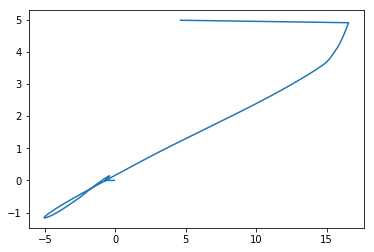

In [30]:
pyplot.plot(pred,y)

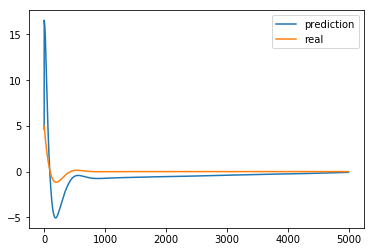

In [31]:
from matplotlib  import pyplot  as plt
pyplot.plot(list(pred), label='prediction')
pyplot.plot(list(y), label='real')
pyplot.legend()
pyplot.show()

In [32]:
pd.DataFrame({'real':list(y),'pred':list(pred)} ) .to_csv('train_data.csv',index=False)